In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
data = pd.read_excel("Perfume_Dataset.xlsx")
data.head()

,ID,Negara,Brand,Perfume Name,Time Usage,Rating,Olfactory Family,Top Notes,Middle Notes,Base Notes,Gender
0,1,Indonesia,alchemist,cachemire,day,4.44,floral woody musky,"pink pepper, apple, cinnamon","violet, ambrette, rose","virginia cedar, musk",unisex
1,2,Indonesia,alchemist,musc laiteux,day,4.71,woody floral musky,"pink pepper, orange blossom","milk, orris, transparent flowers","ambrette, patchouli",unisex
2,3,Indonesia,alchemist,musc vanille,day/night,4.50,oriental woody,"pink pepper, black pepper","coconut, white flowers","vanilla, white musk, woodsy notes",unisex
3,4,Indonesia,alchemist,bois et musc,day/night,4.25,woody,black pepper,"cashmeran, lily of the valley","musk, patchouli, moss",unisex
4,5,Indonesia,alchemist,onirique,night,NaN,floral woody,"pear, orange, clary sage","tuberose, orange blossom, jasmine","vanilla, cedarwood, satin musks",female


In [3]:
data = data.drop('ID', axis= 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24760 entries, 0 to 24759
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            24760 non-null  object 
 1   Brand             24760 non-null  object 
 2   Perfume Name      24760 non-null  object 
 3   Time Usage        15294 non-null  object 
 4   Rating            24262 non-null  float64
 5   Olfactory Family  24760 non-null  object 
 6   Top Notes         24760 non-null  object 
 7   Middle Notes      24760 non-null  object 
 8   Base Notes        24760 non-null  object 
 9   Gender            24760 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.9+ MB


In [5]:
missing_value = data.isnull().sum()
print(missing_value)

Negara                 0
Brand                  0
Perfume Name           0
Time Usage          9466
Rating               498
Olfactory Family       0
Top Notes              0
Middle Notes           0
Base Notes             0
Gender                 0
dtype: int64


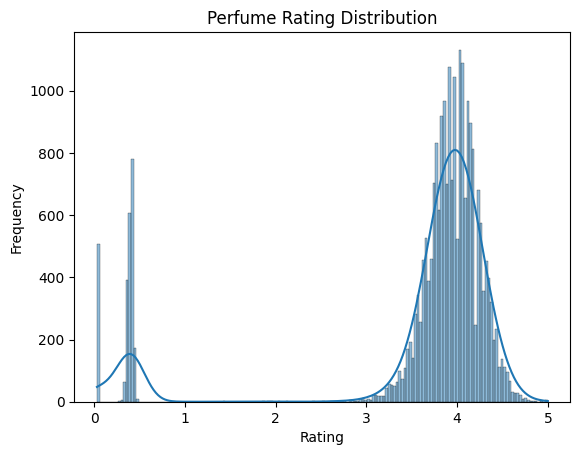

Data tidak terdistribusi normal (gunakan median)


In [6]:
from scipy import stats
ratings = data['Rating'].dropna()

sns.histplot(ratings, kde=True)
plt.title('Perfume Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

stat, p_value = stats.kstest(ratings, 'norm', args=(ratings.mean(), ratings.std()))

alpha = 0.05
if p_value > alpha:
    print('Data terdistribusi normal (gunakan mean)')
    fill_value = ratings.mean()
else:
    print('Data tidak terdistribusi normal (gunakan median)')
    fill_value = ratings.median()

In [7]:
rate_median = ratings.median()
print(rate_median)
print()
data['Rating'].fillna(ratings.median(), inplace=True)
missing_value = data.isnull().sum()
print(missing_value)

3.93

Negara                 0
Brand                  0
Perfume Name           0
Time Usage          9466
Rating                 0
Olfactory Family       0
Top Notes              0
Middle Notes           0
Base Notes             0
Gender                 0
dtype: int64


In [8]:
df = data.copy()

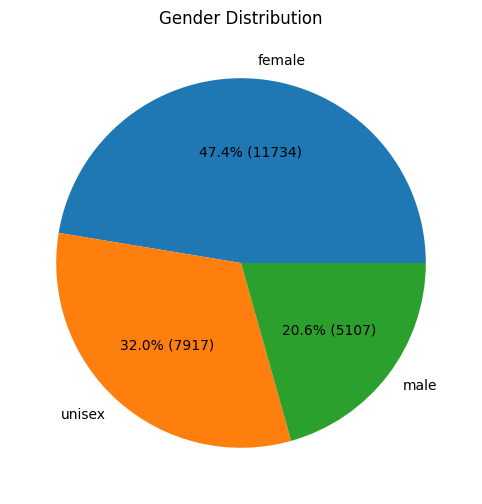

In [9]:
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
total = gender_counts.sum()

gender_counts.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}% ({int(p * total / 100)})'
)

plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


In [10]:
stats = df.describe(include='all').loc[['count', 'unique']]
stats_df = pd.DataFrame(stats)
print("Descriptive Statistic:\n")
stats_df

Descriptive Statistic:



,Negara,Brand,Perfume Name,Time Usage,Rating,Olfactory Family,Top Notes,Middle Notes,Base Notes,Gender
count,24760,24760,24760,15294,24760.0,24760,24760,24760,24760,24760
unique,54,1113,23360,3,NaN,939,19233,20109,16764,3


In [11]:
for col in ['Top Notes', 'Middle Notes', 'Base Notes']:
    notes = df[col].dropna().astype(str).str.split(', ')
    flat_notes = [note.strip() for sublist in notes for note in sublist]
    print(f"{col} unique notes:", len(set(flat_notes)))

Top Notes unique notes: 1343
Middle Notes unique notes: 1457
Base Notes unique notes: 1023


In [12]:
print(len(df['Olfactory Family'].unique()))
print()
print(df['Olfactory Family'].unique())

939

['floral woody musky' 'woody floral musky' 'oriental woody' 'woody'
 'floral woody' 'gourmand' 'floral aldehyde musky' 'powdery' 'floral'
 'chypre fruity' 'chypre' 'oriental floral' 'woody spicy' 'oriental spicy'
 'citrus aromatic' 'aromatic fougere' 'floral fruity gourmand' 'citrus'
 'floral fruity' 'woody aromatic' 'floral green' 'aromatic'
 'chypre floral' 'warm fruity floral' 'aromatic floral' 'floral aquatic'
 'floral oriental woody' 'earthy citrus woody' 'spicy floral musky'
 'floral musky' 'fruity floral gourmand' 'aromatic spicy gourmand'
 'oriental citrus floral' 'fresh woody' 'aromatic woody' 'fruity floral'
 'floral oriental' 'green floral' 'floral green aldehydic' 'spicy'
 'floral oud' 'woody fresh green' 'fougere aromatic fresh' 'fruity'
 'powdery musky' 'white floral musky' 'oriental gourmand'
 'floral aromatic' 'aromatic aquatic' 'oriental' 'warm floral'
 'oriental woody floral' 'gourmand floral' 'citrus aromatic woody'
 'citrus gourmand' 'aromatic fruity' 'oriental

In [13]:
unique_values = df['Olfactory Family'].str.strip().str.lower().dropna().unique()
len(unique_values)

939

In [14]:
def consistency_family(value):
    if pd.isna(value):
        return value
    words = value.split()

    if 'musky' in words and 'powdery' in words:
        words.remove('powdery')

    if 'chypre' in words and any(word in words for word in ['leather', 'woody', 'spicy']):
        words.remove('chypre')

    return ' '.join(sorted(words))

df['Olfactory Family'] = df['Olfactory Family'].apply(consistency_family)
unique_olfactory = df['Olfactory Family'].dropna().unique()

print(len(unique_olfactory))

776


In [15]:
missing_value1 = df.isnull().sum()
print(missing_value1)

Negara                 0
Brand                  0
Perfume Name           0
Time Usage          9466
Rating                 0
Olfactory Family       0
Top Notes              0
Middle Notes           0
Base Notes             0
Gender                 0
dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [17]:
df["CombinedNotes"] = df.apply(lambda row: str(row['Top Notes']) + ', ' + str(row['Middle Notes']) + ', ' + str(row['Base Notes']), axis=1)
df_missing = df[df['Time Usage'].isnull()]
df_labeled = df[df['Time Usage'].notnull()]

In [18]:
def custom_tokenizer(text):
    return[token.strip() for token in text.split(',') if token.strip()]

In [19]:
X = df_labeled['CombinedNotes']
y = df_labeled['Time Usage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(tokenizer=custom_tokenizer, lowercase = True, max_features= 1000)),
    ("clf", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

In [21]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 tokenizer=<function custom_tokenizer at 0x00000205520781F8>)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [22]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         day       0.77      0.80      0.79      1060
   day/night       0.72      0.69      0.71      1062
       night       0.84      0.84      0.84       937

    accuracy                           0.78      3059
   macro avg       0.78      0.78      0.78      3059
weighted avg       0.77      0.78      0.78      3059



In [23]:
X_missing = df_missing['CombinedNotes']
y_missing_pred = pipeline.predict(X_missing)
df_missing['Time Usage'] = y_missing_pred

In [24]:
print("existing time usage")
print(df_labeled['Time Usage'].value_counts())
print()
print("added time usage")
print(df_missing['Time Usage'].value_counts())

existing time usage
day/night    5226
day          5213
night        4855
Name: Time Usage, dtype: int64

added time usage
day          3571
night        3006
day/night    2889
Name: Time Usage, dtype: int64


In [25]:
df_final = pd.concat([df_labeled, df_missing]).sort_index()
df_final.loc[189]

Negara                                                      Indonesia
Brand                                                         mykonos
Perfume Name                                     pistachio cream cake
Time Usage                                                      night
Rating                                                           3.93
Olfactory Family                                             gourmand
Top Notes             whipped cream accord, pistachio, crumble accord
Middle Notes                                       praline, ice cream
Base Notes                                  orcanox, musk, tonka bean
Gender                                                         unisex
CombinedNotes       whipped cream accord, pistachio, crumble accor...
Name: 189, dtype: object

In [26]:
missing_value_fin = df_final.isnull().sum()
print(missing_value_fin) 

Negara              0
Brand               0
Perfume Name        0
Time Usage          0
Rating              0
Olfactory Family    0
Top Notes           0
Middle Notes        0
Base Notes          0
Gender              0
CombinedNotes       0
dtype: int64


In [27]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [28]:
df_final.head()

,Negara,Brand,Perfume Name,Time Usage,Rating,Olfactory Family,Top Notes,Middle Notes,Base Notes,Gender,CombinedNotes
0,Indonesia,alchemist,cachemire,day,4.44,floral musky woody,"pink pepper, apple, cinnamon","violet, ambrette, rose","virginia cedar, musk",unisex,"pink pepper, apple, cinnamon, violet, ambrette..."
1,Indonesia,alchemist,musc laiteux,day,4.71,floral musky woody,"pink pepper, orange blossom","milk, orris, transparent flowers","ambrette, patchouli",unisex,"pink pepper, orange blossom, milk, orris, tran..."
2,Indonesia,alchemist,musc vanille,day/night,4.50,oriental woody,"pink pepper, black pepper","coconut, white flowers","vanilla, white musk, woodsy notes",unisex,"pink pepper, black pepper, coconut, white flow..."
3,Indonesia,alchemist,bois et musc,day/night,4.25,woody,black pepper,"cashmeran, lily of the valley","musk, patchouli, moss",unisex,"black pepper, cashmeran, lily of the valley, m..."
4,Indonesia,alchemist,onirique,night,3.93,floral woody,"pear, orange, clary sage","tuberose, orange blossom, jasmine","vanilla, cedarwood, satin musks",female,"pear, orange, clary sage, tuberose, orange blo..."


In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24760 entries, 0 to 24759
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            24760 non-null  object 
 1   Brand             24760 non-null  object 
 2   Perfume Name      24760 non-null  object 
 3   Time Usage        24760 non-null  object 
 4   Rating            24760 non-null  float64
 5   Olfactory Family  24760 non-null  object 
 6   Top Notes         24760 non-null  object 
 7   Middle Notes      24760 non-null  object 
 8   Base Notes        24760 non-null  object 
 9   Gender            24760 non-null  object 
 10  CombinedNotes     24760 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.8+ MB


In [30]:
print("Dataset Shape:", df_final.shape)
print("\nMissing Values:")
print(df_final.isnull().sum())
print("\nData Types:")
print(df_final.dtypes)

Dataset Shape: (24760, 11)

Missing Values:
Negara              0
Brand               0
Perfume Name        0
Time Usage          0
Rating              0
Olfactory Family    0
Top Notes           0
Middle Notes        0
Base Notes          0
Gender              0
CombinedNotes       0
dtype: int64

Data Types:
Negara               object
Brand                object
Perfume Name         object
Time Usage           object
Rating              float64
Olfactory Family     object
Top Notes            object
Middle Notes         object
Base Notes           object
Gender               object
CombinedNotes        object
dtype: object


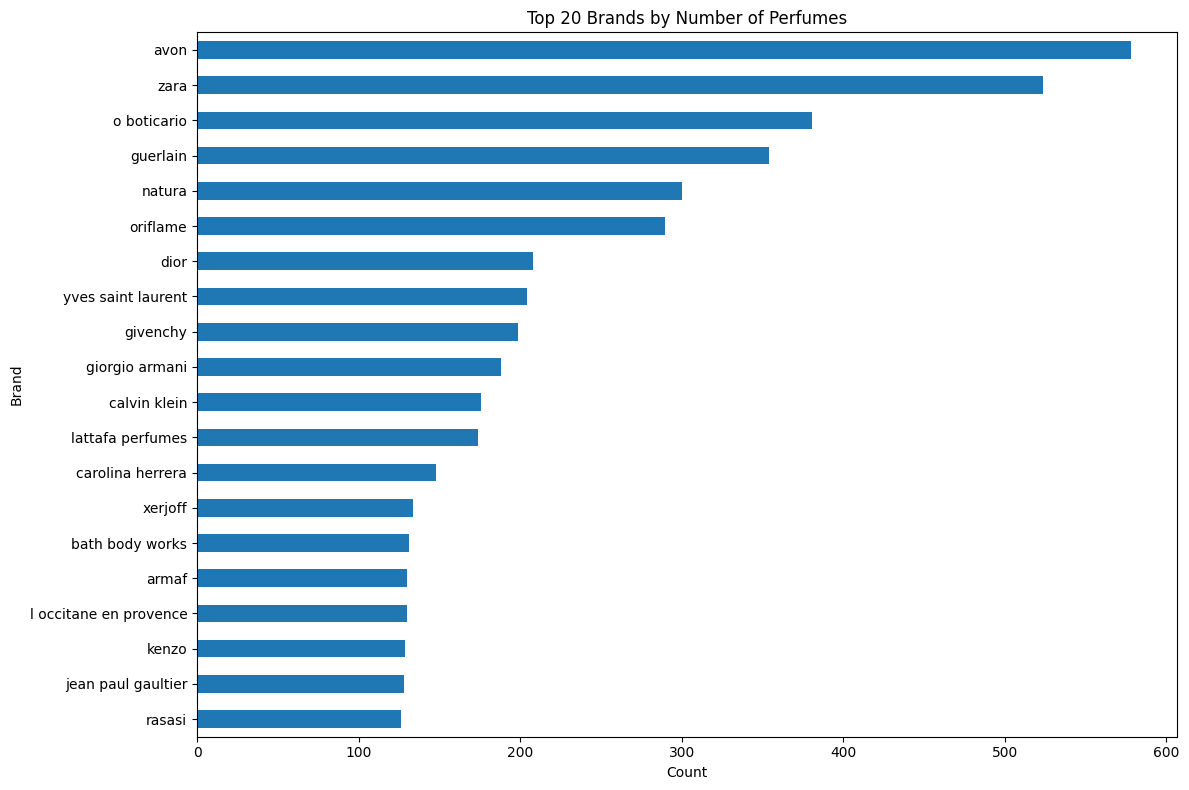

In [31]:
plt.figure(figsize=(12, 8))
df_final['Brand'].value_counts().head(20).sort_values().plot(kind='barh')
plt.title('Top 20 Brands by Number of Perfumes')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

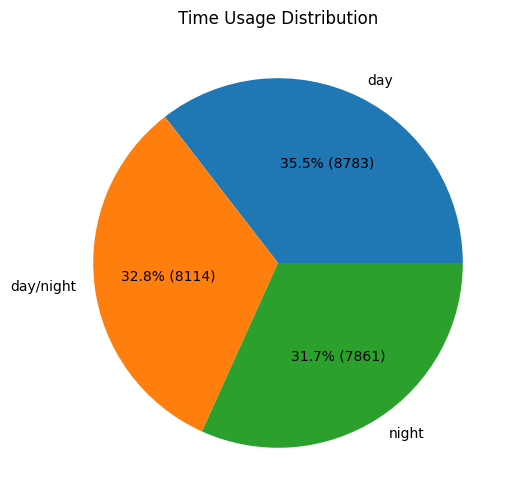

In [32]:
plt.figure(figsize=(8, 6))
timeusage_counts = df_final['Time Usage'].value_counts()
total = timeusage_counts.sum()

timeusage_counts.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}% ({int(p * total / 100)})'
)

plt.title('Time Usage Distribution')
plt.ylabel('')
plt.show()


In [33]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [34]:
df_final['Olfactory Family'] = df_final['Olfactory Family'].astype(str).apply(lambda x: ', '.join(x.split()))
df_final['Olfactory Family'].head()

df_final['Negara'] = df_final['Negara'].str.lower().replace({
    'as': 'amerika serikat',
    'uae': 'arab',
    'uk': 'inggris',
    'arab saudi': 'arab'
})

df_final['Combined_Features'] = (
    df_final['Negara'].apply(preprocess_text) + ' ' +
    df_final['Brand'].apply(preprocess_text) + ' ' +
    df_final['Perfume Name'].apply(preprocess_text) + ' ' +
    df_final['Olfactory Family'].apply(preprocess_text) + ' ' +
    df_final['CombinedNotes'].apply(preprocess_text)
)

df_final['Gender'] = df_final['Gender'].str.lower().replace({
    'female': 'wanita',
    'male': 'pria',
    'unisex': 'unisex'
})

df_final['Time Usage'] = df_final['Time Usage'].str.lower().replace({
    'day': 'siang',
    'night': 'malam',
    'day/night': 'siang dan malam'
})

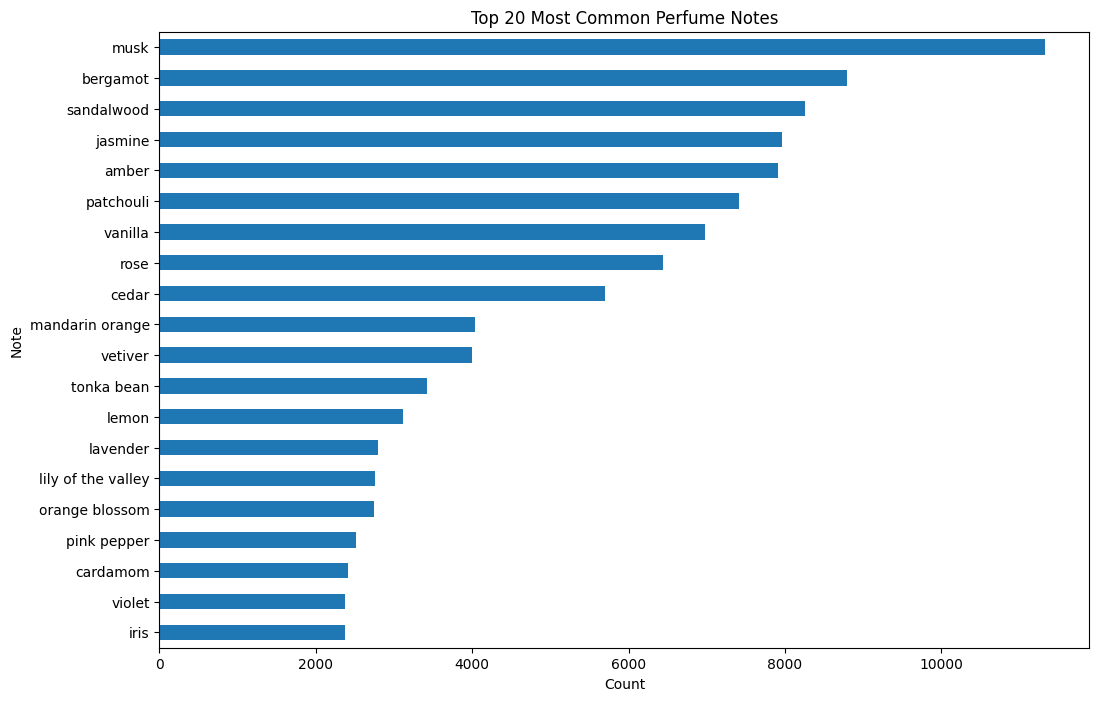

In [35]:
all_notes = df_final['CombinedNotes'].dropna().str.lower().str.split(',').explode().str.strip()
note_counts = all_notes.value_counts()
 
plt.figure(figsize=(12, 8))
note_counts.head(20).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Note')
plt.title('Top 20 Most Common Perfume Notes')
plt.gca().invert_yaxis()
plt.show()

In [36]:
df_final.to_csv('perfume_dataset_final.csv')

### Content-Based Filtering Recommendation System using Jaccard Similarity

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
import pandas as pd
import numpy as np
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

class PerfumeRecommender:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
        self.df['Rating'] = pd.to_numeric(self.df['Rating'], errors='coerce')
        self.df = self.df.dropna(subset=['Combined_Features', 'Rating'])
        self.vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(' '))
        self.tfidf_matrix = self.vectorizer.fit_transform(self.df['Combined_Features'])
        self.binary_matrix = (self.tfidf_matrix > 0).astype(int)
        
        self.stopword_factory = StopWordRemoverFactory()
        self.stopwords = self.stopword_factory.get_stop_words()
        self.stopwords.extend(['parfum', 'perfume', 'parfume', 'notes', 'aroma', 'wangi'])
    
    def get_recommendations(self, gender, time_usage, description, exclusions, top_n=3):
        print("\n=== DEBUGGING ===")
        print(f"Original Input: gender={gender}, time={time_usage}, desc={description}, excl={exclusions}")
        
        description = description.lower()
        exclusions = exclusions.lower() if exclusions else ""

        desc_keywords, rating_filter = self._extract_keywords_and_rating(description)
        excl_keywords = self._extract_keywords(exclusions)
        
        print(f"Desc Keywords: {desc_keywords}")
        print(f"Rating Filter: {rating_filter}")
        print(f"Excl Keywords: {excl_keywords}")

        filtered_df = self.df[
            (self.df['Gender'].str.lower() == gender.lower()) & 
            (self.df['Time Usage'].str.lower() == time_usage.lower())
        ].copy()
        print(f"\nInitial filter count: {len(filtered_df)}")

        for i, keyword in enumerate(desc_keywords):
            if keyword == 'lokal':
                filtered_df = filtered_df[filtered_df['Negara'].str.lower().str.contains('indonesia', na=False)]
                print(f"After lokal filter ({i+1}/{len(desc_keywords)}): {len(filtered_df)} rows")
            else:
                filtered_df = filtered_df[
                    filtered_df['Combined_Features'].str.lower().str.contains(
                        rf'\b{re.escape(keyword)}\b', regex=True, na=False
                    )
                ]
                print(f"After '{keyword}' filter ({i+1}/{len(desc_keywords)}): {len(filtered_df)} rows")
            
            if filtered_df.empty:
                print("! Filter resulted in empty dataframe !")
                return None

        if rating_filter:
            if rating_filter['type'] == 'above':
                filtered_df = filtered_df[filtered_df['Rating'] > rating_filter['value']]
                print(f"After rating > {rating_filter['value']} filter: {len(filtered_df)} rows")
            elif rating_filter['type'] == 'below':
                filtered_df = filtered_df[filtered_df['Rating'] < rating_filter['value']]
                print(f"After rating < {rating_filter['value']} filter: {len(filtered_df)} rows")
            
            if filtered_df.empty:
                print("! Rating filter resulted in empty dataframe !")
                return None

        for i, keyword in enumerate(excl_keywords):
            filtered_df = filtered_df[
                ~filtered_df['Combined_Features'].str.lower().str.contains(
                    rf'\b{re.escape(keyword)}\b', regex=True, na=False
                )
            ]
            print(f"After excluding '{keyword}' ({i+1}/{len(excl_keywords)}): {len(filtered_df)} rows")
            
            if filtered_df.empty:
                print("! Exclusion resulted in empty dataframe !")
                return None

        if desc_keywords:
            query_vec = self.vectorizer.transform([' '.join(desc_keywords)])
            query_binary = (query_vec > 0).astype(int).toarray()[0]
            
            similarities = []
            for idx in filtered_df.index:
                item_binary = self.binary_matrix[idx].toarray()[0]
                sim = jaccard_score(query_binary, item_binary, average='binary')
                similarities.append(sim)
            
            filtered_df['similarity'] = similarities
            filtered_df = filtered_df.sort_values('similarity', ascending=False)
        else:
            filtered_df['similarity'] = 0
            filtered_df = filtered_df.sort_values('Rating', ascending=False)
        
        print("\nFinal candidates:")
        print(filtered_df[['Brand', 'Perfume Name', 'Rating', 'Negara', 'similarity']].head())
        
        return filtered_df.head(top_n) if not filtered_df.empty else None
    
    def _extract_keywords_and_rating(self, text):
        keywords = []
        rating_filter = None

        rating_above = re.search(r'rating\w*\s*(?:di\s*)?(?:atas|lebih\s*dari|>)\s*([\d.]+)', text)
        rating_below = re.search(r'rating\w*\s*(?:di\s*)?(?:bawah|kurang\s*dari|<)\s*([\d.]+)', text)
        
        if rating_above:
            rating_filter = {'type': 'above', 'value': float(rating_above.group(1))}
            text = text.replace(rating_above.group(0), '')
        elif rating_below:
            rating_filter = {'type': 'below', 'value': float(rating_below.group(1))}
            text = text.replace(rating_below.group(0), '')

        if 'lokal' in text or 'local' in text:
            keywords.append('lokal')
            text = re.sub(r'(lokal|local)', '', text)

        tokens = re.findall(r'\b[a-z]+\b', text.lower())
        keywords.extend([
            token for token in tokens 
            if token in self.vectorizer.get_feature_names_out() 
            and token not in self.stopwords
        ])
        
        return keywords, rating_filter
    
    def _extract_keywords(self, text):
        if not text:
            return []

        tokens = re.findall(r'\b[a-z]+\b', text.lower())
        return [
            token for token in tokens 
            if token in self.vectorizer.get_feature_names_out() 
            and token not in self.stopwords
        ]

# Example usage
if __name__ == "__main__":
    recommender = PerfumeRecommender('perfume_dataset_final.csv')

    test_recommendations = recommender.get_recommendations(
        gender='wanita',
        time_usage='siang dan malam',
        description='butuh parfum prancis yang ada notes fruity apple',
        exclusions='jangan ada wangi vanilla'
    )
    
    if test_recommendations is not None:
        print("\nTop Recommendations:")
        print(test_recommendations[['Brand', 'Perfume Name', 'Rating', 'Negara', 'Gender', 
                                  'Time Usage', 'CombinedNotes', 'similarity']])
    else:
        print("\nMaaf, rekomendasi tidak tersedia untuk kriteria yang diminta.")


=== DEBUGGING ===
Original Input: gender=wanita, time=siang dan malam, desc=butuh parfum prancis yang ada notes fruity apple, excl=jangan ada wangi vanilla
Desc Keywords: ['prancis', 'fruity', 'apple']
Rating Filter: None
Excl Keywords: ['vanilla']

Initial filter count: 4700
After 'prancis' filter (1/3): 1463 rows
After 'fruity' filter (2/3): 564 rows
After 'apple' filter (3/3): 70 rows
After excluding 'vanilla' (1/1): 34 rows

Final candidates:
             Brand             Perfume Name  Rating   Negara  similarity
22602    phytoderm              pure secret    4.32  prancis    0.214286
4732   yves rocher  moment de bonheur l eau    3.71  prancis    0.200000
3308         creed            spring flower    3.63  prancis    0.200000
14255    fragonard       mademoiselle amour    4.01  prancis    0.187500
2496        azzaro         azzaro duo women    3.57  prancis    0.187500

Top Recommendations:
             Brand             Perfume Name  Rating   Negara  Gender  \
22602    phytode

### Evaluasi Model

In [45]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Fungsi untuk menghitung DCG
def dcg_at_k(relevance_scores, k):
    relevance_scores = np.asfarray(relevance_scores)[:k]
    if relevance_scores.size:
        return np.sum(relevance_scores / np.log2(np.arange(2, relevance_scores.size + 2)))
    return 0.0

# Fungsi untuk menghitung nDCG
def ndcg_at_k(relevance_scores, k):
    dcg = dcg_at_k(relevance_scores, k)
    ideal_dcg = dcg_at_k(sorted(relevance_scores, reverse=True), k)
    return dcg / ideal_dcg if ideal_dcg > 0 else 0.0

# Fungsi untuk menghitung coverage
def calculate_coverage(recommender, test_cases, k=3):
    all_items = set(recommender.df.index)
    recommended_items = set()
    
    for case in test_cases:
        recommendations = recommender.get_recommendations(
            gender=case['gender'],
            time_usage=case['time_usage'],
            description=case['description'],
            exclusions=case['exclusions'],
            top_n=k
        )
        
        if recommendations is not None:
            recommended_items.update(recommendations.index.tolist())
    
    coverage = len(recommended_items) / len(all_items) if all_items else 0.0
    return coverage

# Fungsi untuk menghitung diversity
def calculate_diversity(recommender, test_cases, k=3):
    distances = []
    
    for case in test_cases:
        recommendations = recommender.get_recommendations(
            gender=case['gender'],
            time_usage=case['time_usage'],
            description=case['description'],
            exclusions=case['exclusions'],
            top_n=k
        )
        
        if recommendations is None or len(recommendations) < 2:
            continue
            
        # Menggunakan fitur TF-IDF untuk menghitung diversity
        features = recommender.vectorizer.transform(recommendations['Combined_Features'])
        pairwise_dist = pairwise_distances(features, metric='cosine')
        np.fill_diagonal(pairwise_dist, np.nan)  # Mengabaikan diagonal
        avg_dist = np.nanmean(pairwise_dist)
        distances.append(avg_dist)
    
    diversity = np.mean(distances) if distances else 0.0
    return diversity

# Fungsi evaluasi yang diperbarui
def evaluate_recommender(recommender, test_cases, k=3):
    precision_list = []
    recall_list = []
    ndcg_list = []

    for case in test_cases:
        gender = case['gender']
        time_usage = case['time_usage']
        description = case['description']
        exclusions = case['exclusions']
        relevant_items = case['relevant_items']

        recommendations = recommender.get_recommendations(
            gender=gender,
            time_usage=time_usage,
            description=description,
            exclusions=exclusions,
            top_n=k
        )

        if recommendations is None or recommendations.empty:
            precision_list.append(0.0)
            recall_list.append(0.0)
            ndcg_list.append(0.0)
            continue

        recommended_indices = recommendations.index.tolist()
        relevance = [1 if item in relevant_items else 0 for item in recommended_indices]

        true_positives = sum(relevance)
        precision = true_positives / k
        recall = true_positives / len(relevant_items) if relevant_items else 0.0
        ndcg = ndcg_at_k(relevance, k)

        precision_list.append(precision)
        recall_list.append(recall)
        ndcg_list.append(ndcg)

    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_ndcg = np.mean(ndcg_list)
    
    # Hitung metrik baru
    coverage = calculate_coverage(recommender, test_cases, k)
    diversity = calculate_diversity(recommender, test_cases, k)

    print()
    print(f"Average Precision@{k}: {avg_precision:.4f}")
    print(f"Average Recall@{k}: {avg_recall:.4f}")
    print(f"Average nDCG@{k}: {avg_ndcg:.4f}")
    print(f"Catalog Coverage: {coverage:.4f}")
    print(f"Diversity (avg pairwise distance): {diversity:.4f}")

    return {
        'Precision@K': avg_precision,
        'Recall@K': avg_recall,
        'nDCG@K': avg_ndcg,
        'Coverage': coverage,
        'Diversity': diversity
    }

# Contoh penggunaan
if __name__ == "__main__":
    recommender = PerfumeRecommender('perfume_dataset_final.csv')

    test_cases = [
        {
            'gender': 'unisex',
            'time_usage': 'siang',
            'description': 'saya ingin parfum lokal floral yang ratingnya di atas 4',
            'exclusions': 'patchouli',
            'relevant_items': [0, 158, 162]
        },
        {
            'gender': 'wanita',
            'time_usage': 'siang dan malam',
            'description': 'butuh parfum prancis yang ada notes fruity apple',
            'exclusions': 'jangan ada wangi vanilla',
            'relevant_items': [2007, 3308, 4732]
        },
        {
            'gender': 'pria',
            'time_usage': 'siang dan malam',
            'description': 'parfum arab yang wangi spicy dengan rating di atas 4.5',
            'exclusions': '-',
            'relevant_items': [24415, 24633, 24747]
        }
    ]

    # Evaluasi recommender
    evaluate_recommender(recommender, test_cases, k=3)



=== DEBUGGING ===
Original Input: gender=unisex, time=siang, desc=saya ingin parfum lokal floral yang ratingnya di atas 4, excl=patchouli
Desc Keywords: ['lokal', 'floral']
Rating Filter: {'type': 'above', 'value': 4.0}
Excl Keywords: ['patchouli']

Initial filter count: 2156
After lokal filter (1/2): 72 rows
After 'floral' filter (2/2): 37 rows
After rating > 4.0 filter: 5 rows
After excluding 'patchouli' (1/1): 3 rows

Final candidates:
            Brand   Perfume Name  Rating     Negara  similarity
0       alchemist      cachemire    4.44  indonesia    0.062500
162  studio sable        ikebana    4.50  indonesia    0.055556
158  speaks to me  healing trail    5.00  indonesia    0.052632

=== DEBUGGING ===
Original Input: gender=wanita, time=siang dan malam, desc=butuh parfum prancis yang ada notes fruity apple, excl=jangan ada wangi vanilla
Desc Keywords: ['prancis', 'fruity', 'apple']
Rating Filter: None
Excl Keywords: ['vanilla']

Initial filter count: 4700
After 'prancis' filter

- Average Precision@3 0.8889
    = ~89% dari rekomendasi yang diberikan relevan dengan preferensi pengguna.

- Average Recall@3 0.8889
    = Sistem mampu menemukan ~89% dari semua item yang seharusnya direkomendasikan.

- Average nDCG@3 0.8978
    = sistem menempatkan item yang paling relevan di posisi teratas. Nilai mendekati 1 menunjukkan performa yang sangat baik.

- Catalog Coverage 0.0004
    = Sistem hanya merekomendasikan sebagian kecil (0.04%) dari total katalog parfum yang tersedia, hal ini karena filtering yang ketat.

- Diversity 0.8862
    = item-item yang direkomendasikan dalam satu daftar sangat beragam dan tidak terlalu mirip satu sama lain

CONCLUSION:
- Sistem efektif dalam memfilter dan merekomendasikan parfum berdasarkan deskripsi.
- Recall tinggi menandakan sistem mampu menemukan mayoritas parfum relevan meskipun top-N hanya 3.
- nDCG tinggi menunjukkan bahwa urutan rekomendasi sangat sesuai harapan — parfum relevan muncul lebih awal.
- Coverage rendah karena filtering yang ketat.
- Sistem memberikan rekomendasi yang bervariasi.
- Masih ada ruang perbaikan bila ingin lebih akurat: misalnya mengintegrasikan bobot notes, seasonality, sillage, projection, longevity, dan review teks.